In [192]:
import requests,json

In [193]:
url='http://map.amap.com/service/subway?_1563453061868&srhdata=1100_drw_beijing.json'


In [194]:
hearders={'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36 QIHU 360SE'}

In [195]:
r=requests.get(url,headers=hearders)  #获取网页内容

In [196]:
p=eval(r.text)  #将字符串转化为字典

In [197]:
outer_most=[ll for ll in p]

In [198]:
outer_most

['s', 'i', 'l', 'o']

In [199]:
def total(p):
    outer_dict=[i for i in p['l']]
    total_lists=[]
    for middle_dict in outer_dict:
        station_lists=middle_dict['st'] #地铁站名称和为hi列表
        route_name=middle_dict['ln'] #地铁线名称
        #print(route_name)
        railway_dict={}
        station_name=[]
        zuobiao=[]
        for station_dict in station_lists:
            name=station_dict['n']
            latsat=station_dict['sl']
            station_name.append(name)
            zuobiao.append(latsat)
        couple=list(zip(station_name,zuobiao))
        railway_dict[route_name]=couple
        total_lists.append(railway_dict)
    return

In [200]:
total(p)

In [201]:
total_lists

[{'S1线': [('金安桥', '116.163167,39.923620'),
   ('四道桥', '116.134010,39.916030'),
   ('桥户营', '116.125809,39.912383'),
   ('上岸', '116.122225,39.905138'),
   ('栗园庄', '116.123254,39.895780'),
   ('小园', '116.114443,39.890465'),
   ('石厂', '116.100334,39.889378')]},
 {'1号线': [('苹果园', '116.177388,39.926727'),
   ('古城', '116.190337,39.907450'),
   ('八角游乐园', '116.212684,39.907442'),
   ('八宝山', '116.235948,39.907440'),
   ('玉泉路', '116.252888,39.907433'),
   ('五棵松', '116.273987,39.907456'),
   ('万寿路', '116.294765,39.907474'),
   ('公主坟', '116.309919,39.907469'),
   ('军事博物馆', '116.321459,39.907422'),
   ('木樨地', '116.337583,39.907379'),
   ('南礼士路', '116.352583,39.907234'),
   ('复兴门', '116.356866,39.907242'),
   ('西单', '116.374072,39.907383'),
   ('天安门西', '116.391278,39.907472'),
   ('天安门东', '116.401216,39.907780'),
   ('王府井', '116.411571,39.908069'),
   ('东单', '116.418480,39.908325'),
   ('建国门', '116.435806,39.908501'),
   ('永安里', '116.450497,39.908454'),
   ('国贸', '116.461841,39.909104'),
   ('大望路', '

In [202]:
def total_format():
    railway_dict={}  #放入地铁线为键名，及其地铁站和经纬度为值构成的字典
    sta_site_lists=[]  #不同地铁线线路忠地铁站为键名，对应经纬度为值，所构成的字典
    station_site_union={} #将所有地铁站和对应经纬度放到字典中
    for total in total_lists:

        railway_list=[]
        for railway_name,staion_sites in total.items():
            sta_zuo_dict={}
            for station,site in staion_sites:
                sta_zuo_dict[station]=eval(site)
            railway_list.append(sta_zuo_dict)
            railway_dict[railway_name]=railway_list  
    
    for rail_name,sta_site_list in railway_dict.items():
        sta_site_lists+=sta_site_list  #将所有地铁站和位置放到列表中
    for sta_site_dicts in sta_site_lists:
        sta_site_dict=sta_site_dicts   #将地铁站设为键，将地铁的经纬度设为值
    
    for sta_site in sta_site_lists:
        station_site_union.update(sta_site)  #将所有的地铁站对应经纬度合并到一个字典中
    return

In [203]:
total_format()

In [204]:
railway_dict

{'10号线': [{'三元桥': (116.456997, 39.961508),
   '丰台站': (116.30454, 39.849639),
   '亮马桥': (116.461794, 39.949415),
   '健德门': (116.381353, 39.976723),
   '公主坟': (116.309919, 39.907469),
   '六里桥': (116.302808, 39.880239),
   '农业展览馆': (116.461724, 39.941344),
   '分钟寺': (116.453976, 39.852227),
   '劲松': (116.461325, 39.884387),
   '北土城': (116.394193, 39.976953),
   '十里河': (116.457983, 39.866417),
   '双井': (116.460627, 39.893479),
   '呼家楼': (116.461618, 39.923337),
   '团结湖': (116.461806, 39.933747),
   '国贸': (116.461841, 39.909104),
   '大红门': (116.399154, 39.845383),
   '太阳宫': (116.447469, 39.972678),
   '安贞门': (116.405954, 39.977005),
   '宋家庄': (116.428368, 39.845849),
   '巴沟': (116.293727, 39.974179),
   '惠新西街南口': (116.417537, 39.977121),
   '慈寿寺': (116.295467, 39.933268),
   '成寿寺': (116.447531, 39.845874),
   '泥洼': (116.304173, 39.858609),
   '海淀黄庄': (116.317564, 39.975996),
   '潘家园': (116.460926, 39.875387),
   '火器营': (116.289058, 39.965938),
   '牡丹园': (116.369844, 39.976603),
   '知春路': (1

In [205]:
sta_site_lists

[{'农大南路': (116.282272, 40.021398),
  '北安河': (116.130428, 40.068128),
  '屯佃': (116.21585, 40.068454),
  '永丰': (116.238481, 40.071868),
  '永丰南': (116.248154, 40.065575),
  '温阳路': (116.161361, 40.068516),
  '稻香湖路': (116.188145, 40.068936),
  '西北旺': (116.257923, 40.048703),
  '西苑': (116.290908, 39.998258),
  '马连洼': (116.27252, 40.032637)},
 {'东四': (116.417493, 39.92437),
  '东夏园': (116.73385, 39.903147),
  '东大桥': (116.451657, 39.923054),
  '北海北': (116.386829, 39.933247),
  '北运河东': (116.707056, 39.903268),
  '北运河西': (116.688358, 39.903024),
  '十里堡': (116.502045, 39.923076),
  '南锣鼓巷': (116.404192, 39.933848),
  '呼家楼': (116.461618, 39.923337),
  '常营': (116.599722, 39.925696),
  '平安里': (116.372883, 39.933949),
  '廖公庄': (116.227292, 39.932422),
  '慈寿寺': (116.295467, 39.933268),
  '朝阳门': (116.434584, 39.924499),
  '杨庄': (116.187004, 39.92785),
  '海淀五路居': (116.276531, 39.932584),
  '潞城': (116.747434, 39.902652),
  '物资学院路': (116.639316, 39.926801),
  '田村': (116.252914, 39.929503),
  '白石桥南': (116.32

In [206]:
station_site_union

{'T2航站楼': (116.592808, 40.079311),
 'T3航站楼': (116.615583, 40.052657),
 '七里庄': (116.294292, 39.866773),
 '万安': (116.231977, 39.984001),
 '万寿路': (116.294765, 39.907474),
 '万源街': (116.505403, 39.802971),
 '三元桥': (116.456997, 39.961508),
 '上地': (116.320193, 40.033007),
 '上岸': (116.122225, 39.905138),
 '东单': (116.41848, 39.908325),
 '东四': (116.417493, 39.92437),
 '东四十条': (116.434133, 39.933801),
 '东夏园': (116.73385, 39.903147),
 '东大桥': (116.451657, 39.923054),
 '东湖渠': (116.467412, 40.01067),
 '东直门': (116.435842, 39.941626),
 '东风北桥': (116.485919, 39.958375),
 '东高地': (116.409427, 39.805074),
 '中关村': (116.316467, 39.983991),
 '中国美术馆': (116.410803, 39.923705),
 '丰台东大街': (116.293857, 39.855111),
 '丰台南路': (116.296748, 39.840444),
 '丰台科技园': (116.297176, 39.825233),
 '丰台站': (116.30454, 39.849639),
 '临河里': (116.678811, 39.875496),
 '义和庄': (116.319079, 39.712387),
 '九棵树': (116.657533, 39.890278),
 '九龙山': (116.478695, 39.893222),
 '五棵松': (116.273987, 39.907456),
 '五福堂': (116.423903, 39.785046),
 '五道口':

In [209]:
#不同经纬度间的距离
def get_geo_distance(station1,station2):
    return geo_distance(station_site_union[station1],station_site_union[station2])

In [210]:
get_geo_distance('公主坟','海淀黄庄')

3.4831044498937316

In [211]:
import math

In [212]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [213]:
import networkx as nx

In [214]:
station_graph=nx.Graph()

In [215]:
stations=list(station_site_union.keys())

In [216]:
station_graph.add_nodes_from(stations)

In [217]:
%matplotlib inline

In [218]:
import matplotlib.pyplot as plt

In [219]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [220]:
threshold=1.5  #距离为1.5km
from collections import defaultdict

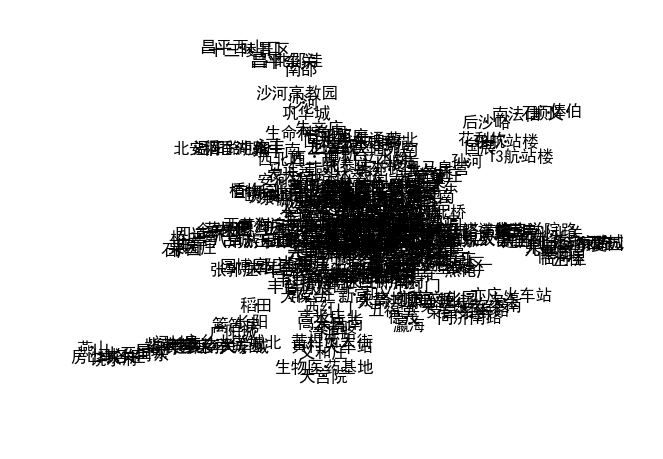

In [222]:
nx.draw(station_graph, station_site_union, with_labels=True, node_size=1)  #北京地铁位置图

In [223]:
station_connection=defaultdict(list)

In [224]:
#选择两站距离小于1.5km的地铁站
for c1 in station_site_union:
    for c2 in station_site_union:
        if c1==c2:continue        
        distance=get_geo_distance(c1,c2)
        if distance<threshold:
            station_connection[c1].append(c2)

In [225]:
station_connection

defaultdict(list,
            {'七里庄': ['丰台站', '六里桥', '泥洼', '丰台东大街', '丰台南路', '西局'],
             '万寿路': ['西钓鱼台', '慈寿寺'],
             '万源街': ['荣京东街'],
             '三元桥': ['亮马桥', '农业展览馆', '太阳宫', '团结湖'],
             '上岸': ['栗园庄', '小园', '桥户营', '四道桥'],
             '东单': ['磁器口',
              '东四',
              '崇文门',
              '中国美术馆',
              '桥湾',
              '灯市口',
              '王府井',
              '天坛东门',
              '北京站',
              '张自忠路'],
             '东四': ['崇文门',
              '雍和宫',
              '中国美术馆',
              '灯市口',
              '王府井',
              '北新桥',
              '东单',
              '北京站',
              '张自忠路'],
             '东四十条': ['东直门', '建国门', '柳芳', '朝阳门'],
             '东大桥': ['广渠门外', '金台夕照', '呼家楼', '农业展览馆', '永安里', '国贸', '团结湖'],
             '东湖渠': ['善各庄', '阜通', '望京', '来广营'],
             '东直门': ['光熙门', '东四十条', '柳芳', '朝阳门'],
             '东风北桥': ['枣营', '朝阳公园', '将台', '望京南'],
             '东高地': ['和义', '火箭万源'],
             '中关村': ['苏州街

In [226]:
station_with_road=nx.Graph(station_connection)

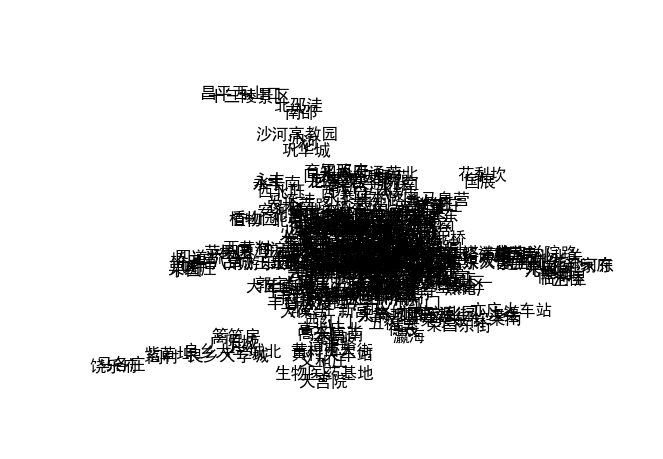

In [227]:
nx.draw(station_with_road,station_site_union,with_labels=True,node_size=1)

In [228]:
#起点到终点经过站的函数
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]
    
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visitied: continue
            
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
        
        visitied.add(froninter)
        
        pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制
    

In [229]:
#最短距离优先
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for station in path[:-1]:
            distance += get_geo_distance(station, path[-1])
            
        return distance

    return sorted(pathes, key=get_path_distnace)

In [230]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [231]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)

In [232]:
def pretty_print(stations):
    print('🚗->'.join(stations))

In [233]:
pretty_print(search('奥体中心', '天安门东', station_connection,transfer_stations_first))

奥体中心🚗->北土城🚗->鼓楼大街🚗->南锣鼓巷🚗->天安门东


In [234]:
pretty_print(search('奥体中心', '天安门东', station_connection,shortest_path_first))

奥体中心🚗->安德里北街🚗->什刹海🚗->南锣鼓巷🚗->天安门东


In [235]:
pretty_print(search('奥体中心', '天安门东', station_connection,transfer_as_much_possible))

奥体中心🚗->森林公园南门🚗->奥林匹克公园🚗->北土城🚗->鼓楼大街🚗->南锣鼓巷🚗->天安门东
